In [45]:
import pandas as pd

df = pd.read_csv("magnetism_split.csv")
df

,Timestamp,Elapsed time (minutes),Set B field (T),B field (T),Ramp speed (T/min),Voltage (V),Inner Lower Temperature,Outer Lower Temperature,Inner Upper Temperature,Outer Upper Temperature,1st Stage Temperature,Shield Temperature,2nd Stage Temperature,Magnetism_ID,Subsection
0,2019-02-08 15:27:38,2.805300,0.0,0.00000,0.000000,0.0,281.797970,285.092220,280.715420,283.969730,145.612170,279.920380,204.958080,./T10/20190208_SMS.txt,1323.0
1,2019-02-08 15:28:01,3.175539,0.0,0.00000,0.000000,0.0,281.768250,285.065830,280.686700,283.941650,145.521580,279.884580,204.900530,./T10/20190208_SMS.txt,1323.0
2,2019-02-08 15:28:23,3.554124,0.0,0.00000,0.000000,0.0,281.737340,285.041560,280.652340,283.915620,145.428630,279.849370,204.839600,./T10/20190208_SMS.txt,1323.0
3,2019-02-08 15:28:46,3.933961,0.0,0.00000,0.000000,0.0,281.704380,285.016630,280.621340,283.886870,145.337970,279.809780,204.778350,./T10/20190208_SMS.txt,1323.0
4,2019-02-08 15:29:09,4.314683,0.0,0.00000,0.000000,0.0,281.673600,284.987760,280.583250,283.856320,145.245560,279.771400,204.720980,./T10/20190208_SMS.txt,1323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2789982,2019-03-20 10:24:29,9833.386000,0.0,-0.00000,0.006867,0.0,5.073398,5.019095,4.877788,4.965012,41.333218,63.687042,3.241164,././T10/20190313_SMS.txt,NaN
2789983,2019-03-20 10:24:35,9833.492000,0.0,-0.00426,0.006867,0.0,5.071438,5.017297,4.876068,4.963015,41.332443,63.700310,3.242243,././T10/20190313_SMS.txt,NaN
2789984,2019-03-20 10:24:42,9833.604500,0.0,-0.00000,0.006867,0.0,5.069822,5.015468,4.874303,4.960119,41.331910,63.710247,3.248909,././T10/20190313_SMS.txt,NaN
2789985,2019-03-20 10:24:48,9833.707000,0.0,-0.00000,0.006867,0.0,5.068294,5.013746,4.872636,4.958283,41.331910,63.720780,3.325273,././T10/20190313_SMS.txt,NaN


In [46]:
float64_cols = list(df.select_dtypes(include='float64'))
df[float64_cols] = df[float64_cols].astype('float32')

In [3]:
# df.iloc[:,3].values.dtype

In [4]:
import pandas as pd
from darts import TimeSeries

# Assuming 'your_dataset.csv' is a string containing the dataset

# df = pd.read_csv(pd.compat.StringIO('your_dataset.csv'))

# Convert the 'Timestamp' column to datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

time_series_list = []
for ccr_id, group in df.groupby('Subsection'):
    # Sort the group by 'Timestamp' if not already sorted
    group.sort_values('Timestamp', inplace=True)
    
    # Set the 'Timestamp' column as the index
    group.set_index('Timestamp', inplace=True)
    
    # Exclude the 'CCR_ID' column from numeric conversion and resampling
    value_cols = ['Elapsed time (minutes)', 'Set B field (T)', 'B field (T)', 'Ramp speed (T/min)', 'Voltage (V)', 'Inner Lower Temperature', 'Outer Lower Temperature', 'Inner Upper Temperature', 'Outer Upper Temperature', '1st Stage Temperature', 'Shield Temperature', '2nd Stage Temperature', ]
    # value_cols = ['Elapsed time (minutes)','Setpoint (K)','Sensor A (K)','Sensor B (K)', 'Heater Output % (0-100)', 'Heater Range (integer 0-5)', 'Slope','Intercept','Sensor C (K) or sensor A (sensor unit)','Sensor D (K) or sensor B (sensor unit)']
    
    # Convert the numeric columns to numeric format, handling non-numeric values as NaN
    for col in value_cols:
        group[col] = pd.to_numeric(group[col], errors='coerce')
    
    # Select only numeric columns for resampling
    numeric_cols = group.select_dtypes(include='number').columns
    
    # Resample the numeric columns to a fixed frequency
    group_resampled = group[numeric_cols].resample('1S').mean()  # Adjust '5S' to the desired frequency
    
    # Handle missing values if necessary
    group_resampled = group_resampled.fillna(method='ffill')  # Forward fill missing values, or choose another appropriate method
    
    # Convert the resampled DataFrame to a Darts TimeSeries object
    time_series = TimeSeries.from_dataframe(group_resampled, value_cols=value_cols)
    
    time_series_list.append(time_series)



KeyboardInterrupt



In [50]:
!pwd

/storage/rwp2/Pipeline/Dask


In [52]:
cd Best

/storage/rwp2/Pipeline/Dask/Best


In [ ]:
len(time_series_list[0])

In [2]:
import pickle

In [ ]:
with open('timeseries_split_1S','wb') as f: pickle.dump(time_series_list, f)

In [3]:
with open('timeseries','rb') as f: time_series_loaded = pickle.load(f)

In [71]:
# print(time_series_loaded == time_series_list)

In [72]:
# print(len(time_series_list[0]))

In [4]:
time_series_list = time_series_loaded

In [5]:
# fix python path if working locally
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    VARIMA,
)
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset, ElectricityDataset

import logging

logging.disable(logging.CRITICAL)

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

2023-08-04 09:57:35 darts.models WARNING: The statsforecast module could not be imported. To enable support for the StatsForecastAutoARIMA, StatsForecastAutoETS and Croston models, please consider installing it.


In [6]:
time_series_list_scaled = []

for time_series in time_series_list:
    scaler = Scaler()
    time_series_list_scaled.append(scaler.fit_transform(time_series))

In [7]:
# print(time_series_list_scaled[0].columns)
from darts import TimeSeries
temp = []
# Assuming you have a Darts TimeSeries object named 'ts'

# Convert the TimeSeries to a pandas DataFrame
for ts in time_series_list_scaled:
    df = ts.pd_dataframe()

    # Rename the columns in the pandas DataFrame
    new_column_names = ['Normalized Elapsed time (minutes)', 'Normalized Set B field (T)', 'Normalized B field (T)',
       'Normalized Ramp speed (T/min)', 'Normalized Voltage (V)', 'Normalized Inner Lower Temperature',
       'Normalized Outer Lower Temperature', 'Normalized Inner Upper Temperature',
       'Normalized Outer Upper Temperature', 'Normalized 1st Stage Temperature',
       'Normalized Shield Temperature', 'Normalized 2nd Stage Temperature']  # Replace with the new column names you want
    df.columns = new_column_names

    # Convert the modified pandas DataFrame back to a Darts TimeSeries
    temp.append(TimeSeries.from_dataframe(df))
time_series_list_scaled = temp
print(time_series_list_scaled[0].columns)

Index(['Normalized Elapsed time (minutes)', 'Normalized Set B field (T)',
       'Normalized B field (T)', 'Normalized Ramp speed (T/min)',
       'Normalized Voltage (V)', 'Normalized Inner Lower Temperature',
       'Normalized Outer Lower Temperature',
       'Normalized Inner Upper Temperature',
       'Normalized Outer Upper Temperature',
       'Normalized 1st Stage Temperature', 'Normalized Shield Temperature',
       'Normalized 2nd Stage Temperature'],
      dtype='object', name='component')


In [8]:
from darts import TimeSeries

covariates = []
for i in range(len(time_series_list)):
    ts_df = (time_series_list[i]).pd_dataframe()
    columns_to_keep = ['Set B field (T)', 'Elapsed time (minutes)', 'Ramp speed (T/min)', 'Inner Lower Temperature', 
                       'Outer Lower Temperature', 'Inner Upper Temperature',
                       'Outer Upper Temperature', '1st Stage Temperature',
                       'Shield Temperature', '2nd Stage Temperature']
    covariate_ts_df = ts_df[columns_to_keep]
    covariates.append(TimeSeries.from_dataframe(covariate_ts_df))


In [9]:
updated_covariates = []
for i in range(len(covariates)):
    df = covariates[i].pd_dataframe()
    # for time_series in time_series_list_scaled:
    temp = time_series_list_scaled[i].pd_dataframe()
    for col in temp.columns:
        df[col] = temp[col]
    updated_covariates.append(TimeSeries.from_dataframe(df))
    
print(updated_covariates[0].columns)
covariates = updated_covariates

Index(['Set B field (T)', 'Elapsed time (minutes)', 'Ramp speed (T/min)',
       'Inner Lower Temperature', 'Outer Lower Temperature',
       'Inner Upper Temperature', 'Outer Upper Temperature',
       '1st Stage Temperature', 'Shield Temperature', '2nd Stage Temperature',
       'Normalized Elapsed time (minutes)', 'Normalized Set B field (T)',
       'Normalized B field (T)', 'Normalized Ramp speed (T/min)',
       'Normalized Voltage (V)', 'Normalized Inner Lower Temperature',
       'Normalized Outer Lower Temperature',
       'Normalized Inner Upper Temperature',
       'Normalized Outer Upper Temperature',
       'Normalized 1st Stage Temperature', 'Normalized Shield Temperature',
       'Normalized 2nd Stage Temperature'],
      dtype='object', name='component')


In [10]:
from darts import TimeSeries

# ts_df = ts.pd_dataframe()
time_final = []
for i in range(len(time_series_list)):
    ts_df = (time_series_list[i]).pd_dataframe()
    columns_to_keep = ['B field (T)', 'Voltage (V)', 'Ramp speed (T/min)', 'Inner Lower Temperature', 
            'Outer Lower Temperature', 'Inner Upper Temperature',
            'Outer Upper Temperature', '1st Stage Temperature',
            'Shield Temperature', '2nd Stage Temperature']    
    covariate_ts_df = ts_df[columns_to_keep]
    time_final.append(TimeSeries.from_dataframe(covariate_ts_df))
    
print(len(time_final[0].columns))
# time_final = time_series_list

10


In [11]:
# load data
train, val = [], []
VAL_LEN = 300
temp1, temp2 = [], []

for i in range(len(time_final)):
    series = time_final[i]
    train.append(series[:-VAL_LEN])
    val.append(series[-VAL_LEN:])
    temp1.append(covariates[i][-VAL_LEN:])
    temp2.append(covariates[i][:-VAL_LEN])

# for time_series in time_final:
#     series = time_series.astype(np.float32)
#     train.append(series[:-VAL_LEN])
#     val.append(series[-VAL_LEN:])
    
    
# for time_series in covariates:
#     series = time_series.astype(np.float32)
#     temp.append(series[:-VAL_LEN])
val_past_covariates_past = temp1
covariates = temp2

# split in train / validation (note: in practice we would also need a test set)
# train, val = 


In [64]:
train[1].dtype

dtype('float32')

In [65]:
print(len(train[0]))
print(len(covariates[1]))

14290
9534


In [66]:
train[0]

<TimeSeries (DataArray) (Timestamp: 14290, component: 2, sample: 1)>
array([[[ 0.0029275 ],
        [-0.025     ]],

       [[ 0.00264   ],
        [ 0.        ]],

       [[ 0.00362778],
        [-0.01111111]],

       ...,

       [[ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ]]], dtype=float32)
Coordinates:
  * Timestamp  (Timestamp) datetime64[ns] 2019-02-19T12:55:00 ... 2019-03-01T...
  * component  (component) object 'B field (T)' 'Voltage (V)'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [67]:
print(len(val[0]))

300


In [68]:
# train = train[:2]
# val = val[:2]
# covariates = covariates[:2]
# val_past_covariates_past = val_past_covariates_past[:2]

In [20]:
# class Trial():
#     def suggest_int(self, name, low, high):
#         return low
#     def suggest_categorical(self, name, cats):
#         return cats[0]
#     def suggest_float(self, name, low, high, log = False):
#         return low
        

In [21]:
print(VAL_LEN)

500


In [ ]:
import numpy as np
import optuna
import torch
from optuna.integration import PyTorchLightningPruningCallback
from pytorch_lightning.callbacks import EarlyStopping
from sklearn.preprocessing import MaxAbsScaler

from darts.dataprocessing.transformers import Scaler
from darts.datasets import AirPassengersDataset
from darts.metrics import smape
from darts.models import TCNModel
from darts.utils.likelihood_models import GaussianLikelihood

# scale
# scaler = Scaler(MaxAbsScaler())
# train = scaler.fit_transform(train)
# val = scaler.transform(val)

# define objective function
def objective(trial):
    # select input and output chunk lengths
    in_len = trial.suggest_int("in_len", 60, 200)
    out_len = trial.suggest_int("out_len", 40, in_len-1)
    d_model_length = trial.suggest_int("d_model_length", 60, 68)
    num_encoder_layers_temp = trial.suggest_int("num_encoder_layers_temp", 1, 5)
    num_decoder_layers_temp = trial.suggest_int("num_decoder_layers_temp", 1, 5)

    # Other hyperparameters
    kernel_size = trial.suggest_int("kernel_size", 2, 5)
    num_filters = trial.suggest_int("num_filters", 1, 5)
    weight_norm = trial.suggest_categorical("weight_norm", [False, True])
    dilation_base = trial.suggest_int("dilation_base", 2, 4)
    dropout = trial.suggest_float("dropout", 0.0, 0.4)
    lr = trial.suggest_float("lr", 5e-5, 1e-3, log=True)
    # include_year = trial.suggest_categorical("year", [False, True])

    # throughout training we'll monitor the validation loss for both pruning and early stopping
    pruner = PyTorchLightningPruningCallback(trial, monitor="val_loss")
    early_stopper = EarlyStopping("val_loss", min_delta=0.001, patience=3, verbose=True)
    callbacks = [pruner, early_stopper]
    
    num_workers = 4
        
    pl_trainer_kwargs = {
        "accelerator": "gpu",
        "devices": [0],
        "callbacks": callbacks,
    }

    encoders = None #look into add encoders

    # reproducibility
    torch.manual_seed(42)
    # kernel_size', 'num_filters', 'weight_norm', 'dilation_base']`
    # build the TCN model
    model = TransformerModel(
        input_chunk_length=in_len,
        output_chunk_length=out_len,
        batch_size=32,
        n_epochs=2,
        nr_epochs_val_period=1,
        num_encoder_layers = num_encoder_layers_temp,
        num_decoder_layers = num_decoder_layers_temp,
        # d_model = d_model_length,
        dropout=dropout,
        optimizer_kwargs={"lr": lr},
        add_encoders=encoders,
        likelihood=GaussianLikelihood(),
        pl_trainer_kwargs=pl_trainer_kwargs,
        model_name="tcn_model_1",
        force_reset=True,
        save_checkpoints=True,
    )
    
    # model = TransformerModel(
    # input_chunk_length=in_len,
    # output_chunk_length=out_len,
    # model_name="test5",
    # activation="relu",
    # # random_state=42,
    # save_checkpoints=True,
    # # force_reset=True,
    # pl_trainer_kwargs = {"accelerator": "gpu", "devices": [1]}
    # )
    
    
    # when validating during training, we can use a slightly longer validation
    # set which also contains the first input_chunk_length time steps
    # model_val_set = scaler.transform(series[-(VAL_LEN + in_len) :])
    # model_val_set = []
    # for time_series in time_final:
    #     series = time_series.astype(np.float32)
    #     model_val_set.append(series[-(VAL_LEN + in_len) :])

    # train the model
    model.fit(
        series=train,
        val_series=val,
        # num_loader_workers=1,
        # past_covariates = covariates,
        # val_past_covariates=val_past_covariates_past
    )
    
#     model.fit(
#         series=train,
#         past_covariates=covariates,
#     );

    # reload best model over course of training
    model = TransformerModel.load_from_checkpoint("tcn_model_1")
    
    # Evaluate how good it is on the validation set, using sMAPE
    # preds = model.predict(series=train[0], n=VAL_LEN)
    smapes = 0
    for i in range(len(train)):
        preds = model.predict(
            series=train[i],
            # past_covariates=covariates[i],
            n=VAL_LEN,
            # verbose=verbose,
        )
        smapes += smape(preds, val[i])
    smapes = smapes/len(train)
    smape_val = np.mean(smapes)
    # if smape_val== np.nan:
    #     print("nan")
    return smape_val if smape_val != np.nan else float("inf")


# for convenience, print some optimization trials information
def print_callback(study, trial):
    print(f"Current value: {trial.value}, Current params: {trial.params}")
    print(f"Best value: {study.best_value}, Best params: {study.best_trial.params}")


# optimize hyperparameters by minimizing the sMAPE on the validation set
def run_trial():
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=3, callbacks=[print_callback])
        
if __name__ == "__main__":
    run_trial()
    # objective(Trial())


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

In [12]:
# fix python path if working locally
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import os

from darts import TimeSeries
from darts.utils.timeseries_generation import (
    gaussian_timeseries,
    linear_timeseries,
    sine_timeseries,
)
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
    VARIMA,
)
from darts.metrics import mape, smape, mae
from darts.dataprocessing.transformers import Scaler
from darts.utils.timeseries_generation import datetime_attribute_timeseries
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset, ElectricityDataset

import logging

logging.disable(logging.CRITICAL)

import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

# for reproducibility
torch.manual_seed(1)
np.random.seed(1)

In [16]:
cd ..

/storage/rwp2/Pipeline/Dask


In [31]:
num = 1

In [32]:
loaded_model = TransformerModel.load_from_checkpoint('transformer-4226/T4420')

In [33]:
n_forecast = len(val[num])  # Replace `test` with your test set
pred_series = loaded_model.predict(n=n_forecast, series=train[num])  # Adjust the `n` parameter as needed

Predicting: 0it [00:00, ?it/s]

In [34]:
from darts.metrics import mape, rmse

smape_score = smape(pred_series, val[num])  # Replace `test` with your true future values
rmse_score = rmse(pred_series, val[num])  # Replace `test` with your true future values

print(f"SMAPE: {smape_score:.2f}%")
print(f"RMSE: {rmse_score:.2f}")

SMAPE: 55.01%
RMSE: 3.25


In [35]:
print(np.mean(smape_score))

55.010227896273136


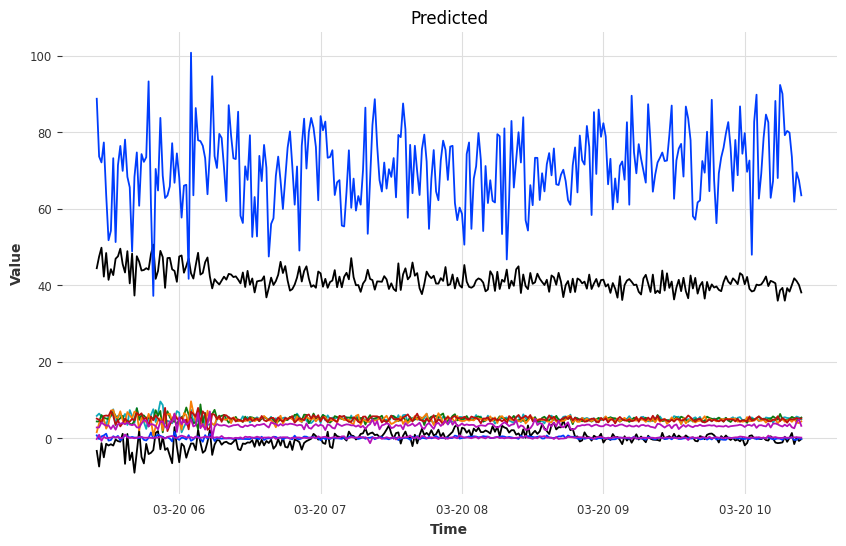

In [39]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming you have a multivariate Darts time series named 'multivariate_time_series'

# Convert the Darts time series to a Pandas DataFrame
df = (pred_series).pd_dataframe()

# Plotting the multivariate time series
plt.figure(figsize=(10, 6))

# Plot each variable separately
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Predicted')
# plt.legend()
plt.grid(True)
plt.show()


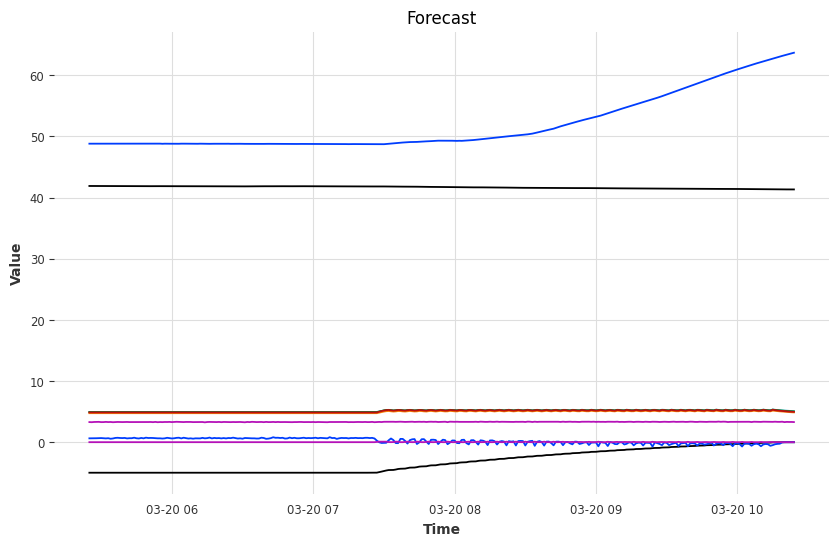

In [41]:
import matplotlib.pyplot as plt
from darts import TimeSeries

# Assuming you have a multivariate Darts time series named 'multivariate_time_series'

# Convert the Darts time series to a Pandas DataFrame
df = (val[num]).pd_dataframe()

# Plotting the multivariate time series
plt.figure(figsize=(10, 6))

# Plot each variable separately
for column in df.columns:
    plt.plot(df.index, df[column], label=column)

plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Forecast')
# plt.legend()
plt.grid(True)
plt.show()


In [23]:
I 2023-07-31 16:21:07,924] Trial 92 finished with value: 
    140.74493944644928 and parameters: {'d_model_length': 67, 'dilation_base': 4, 
                                        'dropout': 0.05325962047210396, 'in_len': 69, 'kernel_size': 5, 
                                        'lr': 0.00035671372383447384, 'num_decoder_layers_temp': 3, 'num_encoder_layers_temp': 5, 
                                        'num_filters': 3, 'out_len': 31, 'weight_norm': False}. Best is trial 92 with value: 140.74493944644928.

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (168242150.py, line 1)